Build a regression model.

Provide model output and an interpretation of the results. 

In [4]:
import statsmodels.api as sm
import pandas as pd

In [5]:
# read the saved file

merged_df = pd.read_csv('merged.csv')

In [16]:
# creating new rows of data to use in regression modeling

for index, row in merged_df.iterrows():
    
    total_slots = row['free_bikes'] + row['empty_slots']
    
    if total_slots == 0:
        percent = 0
        merged_df.at[index, '% used'] = percent
    else:
        percent = row['empty_slots'] / total_slots
        merged_df.at[index, '% used'] = percent
merged_df.rename(columns={'name_x': 'venue name', 'name_y':'bike stop name'}, inplace=True)

In [17]:
merged_df['venues_nearby'] = merged_df.groupby('venue name')['venue name'].transform('count')
merged_df

,Unnamed: 0,Unnamed: 0_x,Bike Stop #,venue name,distance,venue_type,Unnamed: 0_y,bike stop name,latitude,longitude,free_bikes,empty_slots,% used,venues_nearby
0,0,0,1,NaN,NaN,[],1,"PG. TORRAS I BAGES, 129",41.443365,2.190630,17,7,0.291667,NaN
1,1,1,2,NaN,NaN,[],2,"C/ SANT OLEGUER, 2",41.377532,2.170732,13,5,0.277778,NaN
2,2,2,3,NaN,NaN,[],3,"AV. PARAL.LEL, 194",41.375116,2.152309,2,24,0.923077,NaN
3,3,3,4,Montjuic (Barcelona),181.0,Art Museum,4,"C/ BILBAO, 174",41.409020,2.195415,23,9,0.281250,3.0
4,4,4,5,NaN,NaN,[],5,"C/ D'ESCORNALBOU, 51",41.418079,2.176399,22,2,0.083333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,627,627,501,La Fábrica del Sol,190.0,Museum,501,"PG. MARITIM, 23 (HOSPITAL DEL MAR)",41.383365,2.194625,2,24,0.923077,2.0
628,628,628,502,NaN,NaN,[],502,"C/GAVÀ, 81",41.370372,2.138944,9,7,0.437500,NaN
629,629,629,503,NaN,NaN,[],503,"PG. MARíTIM, 31 B (ANNEXA A LA 12)",41.383475,2.194735,0,21,1.000000,NaN
630,630,630,504,NaN,NaN,[],504,AV. LITORAL (PG MARÍTIM DEL PORT OLÍMPIC),41.388913,2.199311,4,23,0.851852,NaN


C:\Users\ellis\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


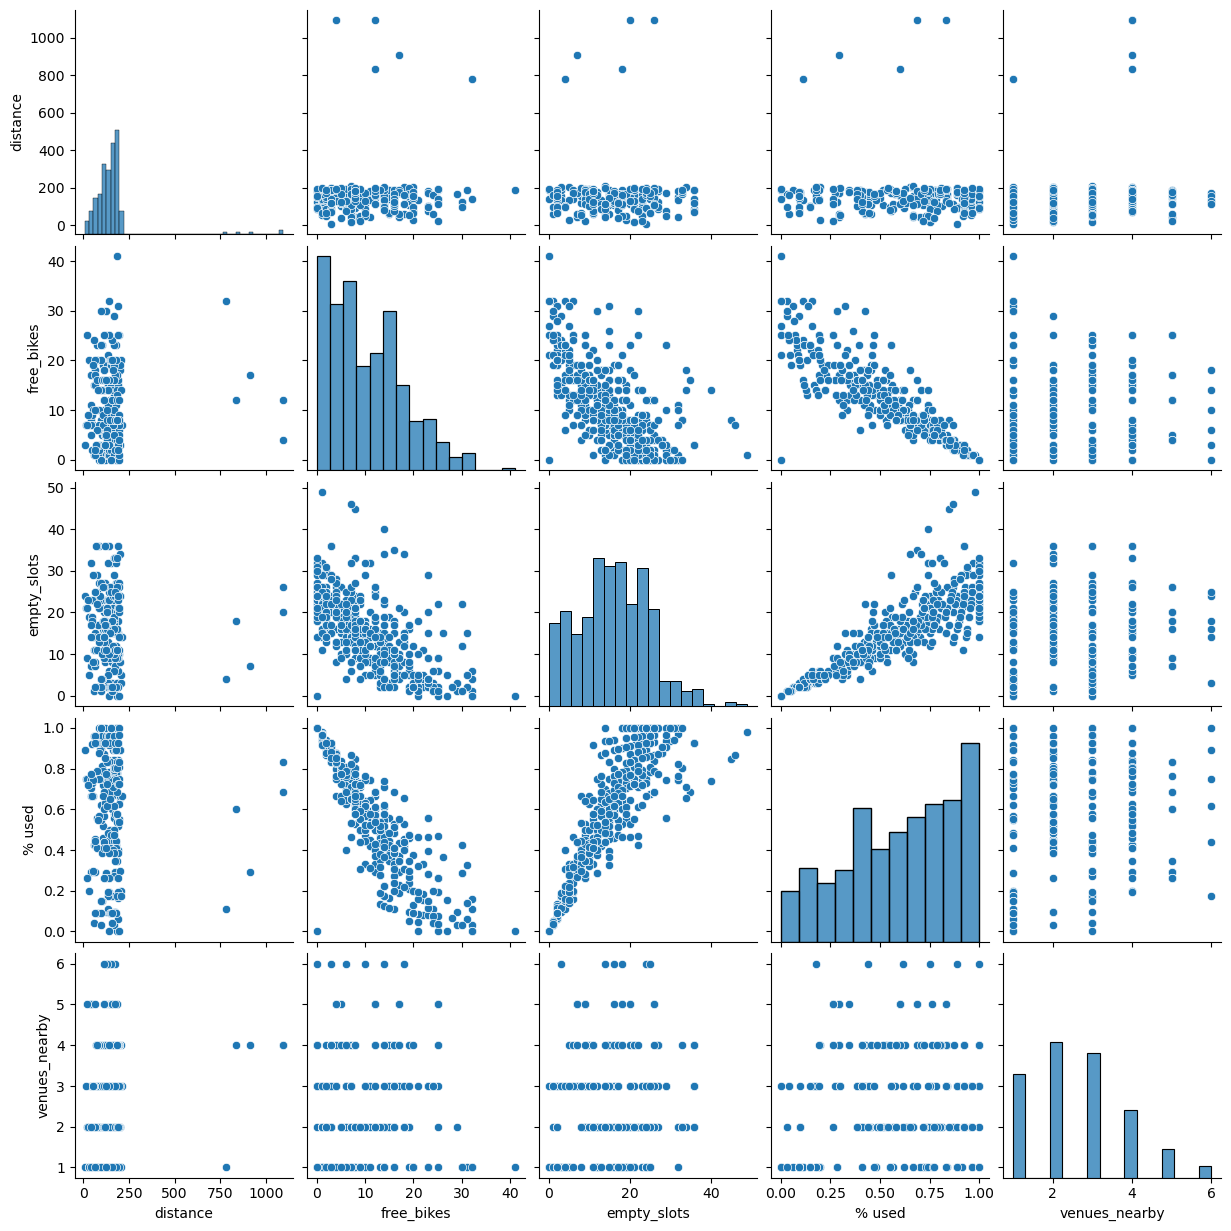

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_of_interest = ['distance', 'free_bikes', 'empty_slots', '% used', 'venues_nearby']  
subset_df = merged_df[columns_of_interest]

# Create a pair plot
sns.pairplot(subset_df)
plt.show()

results can be found in: 
file: images > OLS_regression_results.png

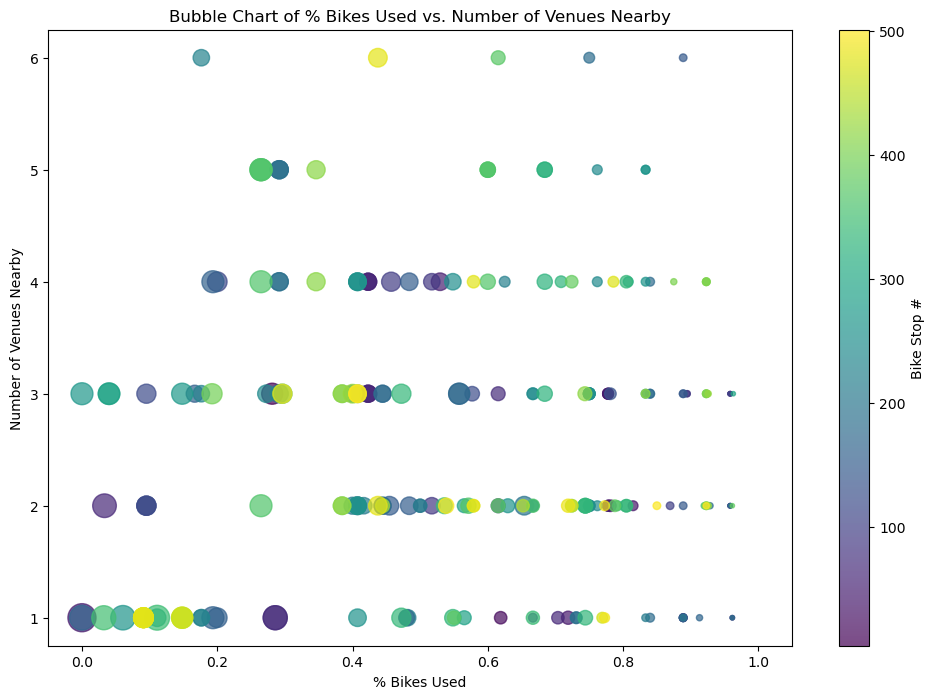

In [19]:
plt.figure(figsize=(12, 8))
plt.scatter(merged_df['% used'], merged_df['venues_nearby'], s=merged_df['free_bikes'] * 10, c=merged_df['Bike Stop #'], cmap='viridis', alpha=0.7)
plt.title('Bubble Chart of % Bikes Used vs. Number of Venues Nearby')
plt.xlabel('% Bikes Used')
plt.ylabel('Number of Venues Nearby')
plt.colorbar(label='Bike Stop #')
plt.show()

Above is the intial exploration of data. Through the pair plot and bubble chart comparison of '% bikes used' and 'venues nearby', an interesting relationship seems to form. Though it does not visually seem strong, it is worth running a regression model on to check whether it is statistically significant.

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [26]:
# drop columns that are not necessary for modelling

final_merged_df = merged_df[merged_df['venues_nearby'].notna()]

df_1 = final_merged_df.drop(columns=['venue name', 'bike stop name',  'venue_type'])
df_1

,Unnamed: 0,Unnamed: 0_x,Bike Stop #,distance,Unnamed: 0_y,latitude,longitude,free_bikes,empty_slots,% used,venues_nearby
3,3,3,4,181.0,4,41.409020,2.195415,23,9,0.281250,3.0
15,15,15,16,94.0,16,41.435460,2.200157,8,13,0.619048,1.0
30,30,30,31,166.0,31,41.376395,2.147327,7,25,0.781250,2.0
36,36,36,37,102.0,37,41.403153,2.144584,5,22,0.814815,2.0
37,37,37,38,105.0,38,41.393489,2.170742,9,23,0.718750,1.0
...,...,...,...,...,...,...,...,...,...,...,...
619,619,619,494,197.0,494,41.425825,2.191206,12,14,0.538462,2.0
622,622,622,497,113.0,497,41.406386,2.187440,16,11,0.407407,3.0
623,623,623,497,123.0,497,41.406386,2.187440,16,11,0.407407,3.0
625,625,625,499,116.0,499,41.376860,2.190670,3,17,0.850000,2.0


In [27]:
X = (df_1['venues_nearby'])
y = pd.Series(df_1['% used'])

In [28]:
X = sm.add_constant(X) # adding a constant
lin_reg = sm.OLS(y,X['venues_nearby'])

In [29]:
model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                 % used   R-squared (uncentered):                   0.678
Model:                            OLS   Adj. R-squared (uncentered):              0.676
Method:                 Least Squares   F-statistic:                              523.4
Date:                Thu, 21 Dec 2023   Prob (F-statistic):                    3.78e-63
Time:                        19:46:43   Log-Likelihood:                         -108.02
No. Observations:                 250   AIC:                                      218.0
Df Residuals:                     249   BIC:                                      221.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

R squared - The coefficient of determination. This predicts that 67.8% of the variability of the '% used' bikes can be explained by the 'venue_nearby' variable.

Coefficents. The coefficient for 'venues_nearby' is 0.1863 suggesting that estimated change in the dependant variable ('% used') for even 1 unit change in the independant variable ('venues_nearby')

P-value. The pvalue is much less than 0.05. This indicated that the coefficient is statistically signiticant

Prop (F-statistic). This small pvalue also indicates that the overall model is significant since it is less than 0.05

Overall, this regression model provides confidence that the number of venues does have a effect on the percentage of bikes being used. As the number of venues increase by 1, there is a 0.1863 increase of the percent of bikes used at the surrounding bike stops (within 200meters) as well. This correlation is statistically significant though does not prove causation as there may be underlying factors that ultimately cause this relationship.

# Stretch

How can you turn the regression model into a classification model?

The hypothesis being test could be changed to whether or not the number of venues would increase or decrease the amount of bikes being used. In that way, the regressions model question tested above would be changed into a classification model. 
